In [1]:
import pennylane as qml 
from pennylane import numpy as np 
import matplotlib.pyplot as plt 
from VarQFT import VarFourier

In [2]:
num_qubits = 7

In [3]:
dev = qml.device( "lightning.qubit", 
                    wires=num_qubits)

varqft = VarFourier( num_qubits,
                    lambda x : x**2/2,
                    lambda p : p**2/2,
                    dev
                    )

In [4]:
val, min_state = varqft.min_energy_eigens()

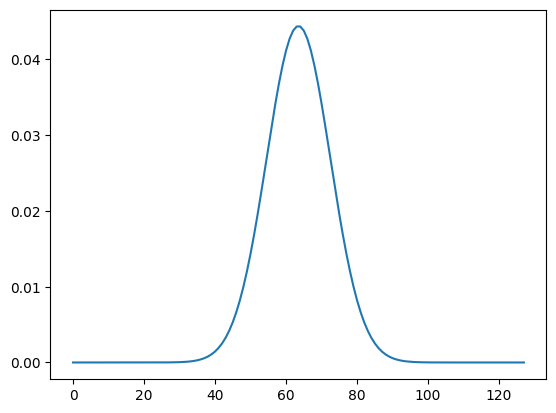

In [5]:
plt.plot( np.abs(min_state)**2 )

In [6]:
def init_state():
    qml.MottonenStatePreparation(min_state, wires=range(num_qubits) )

In [7]:
varqft._set_init_state( init_state )

(<Figure size 400x800 with 1 Axes>, <Axes: >)

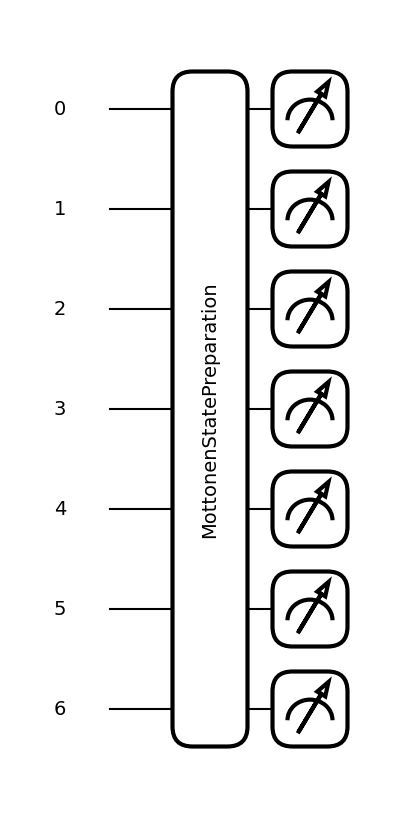

In [8]:
qml.draw_mpl( varqft.X_eval() )()

(<Figure size 3200x800 with 1 Axes>, <Axes: >)

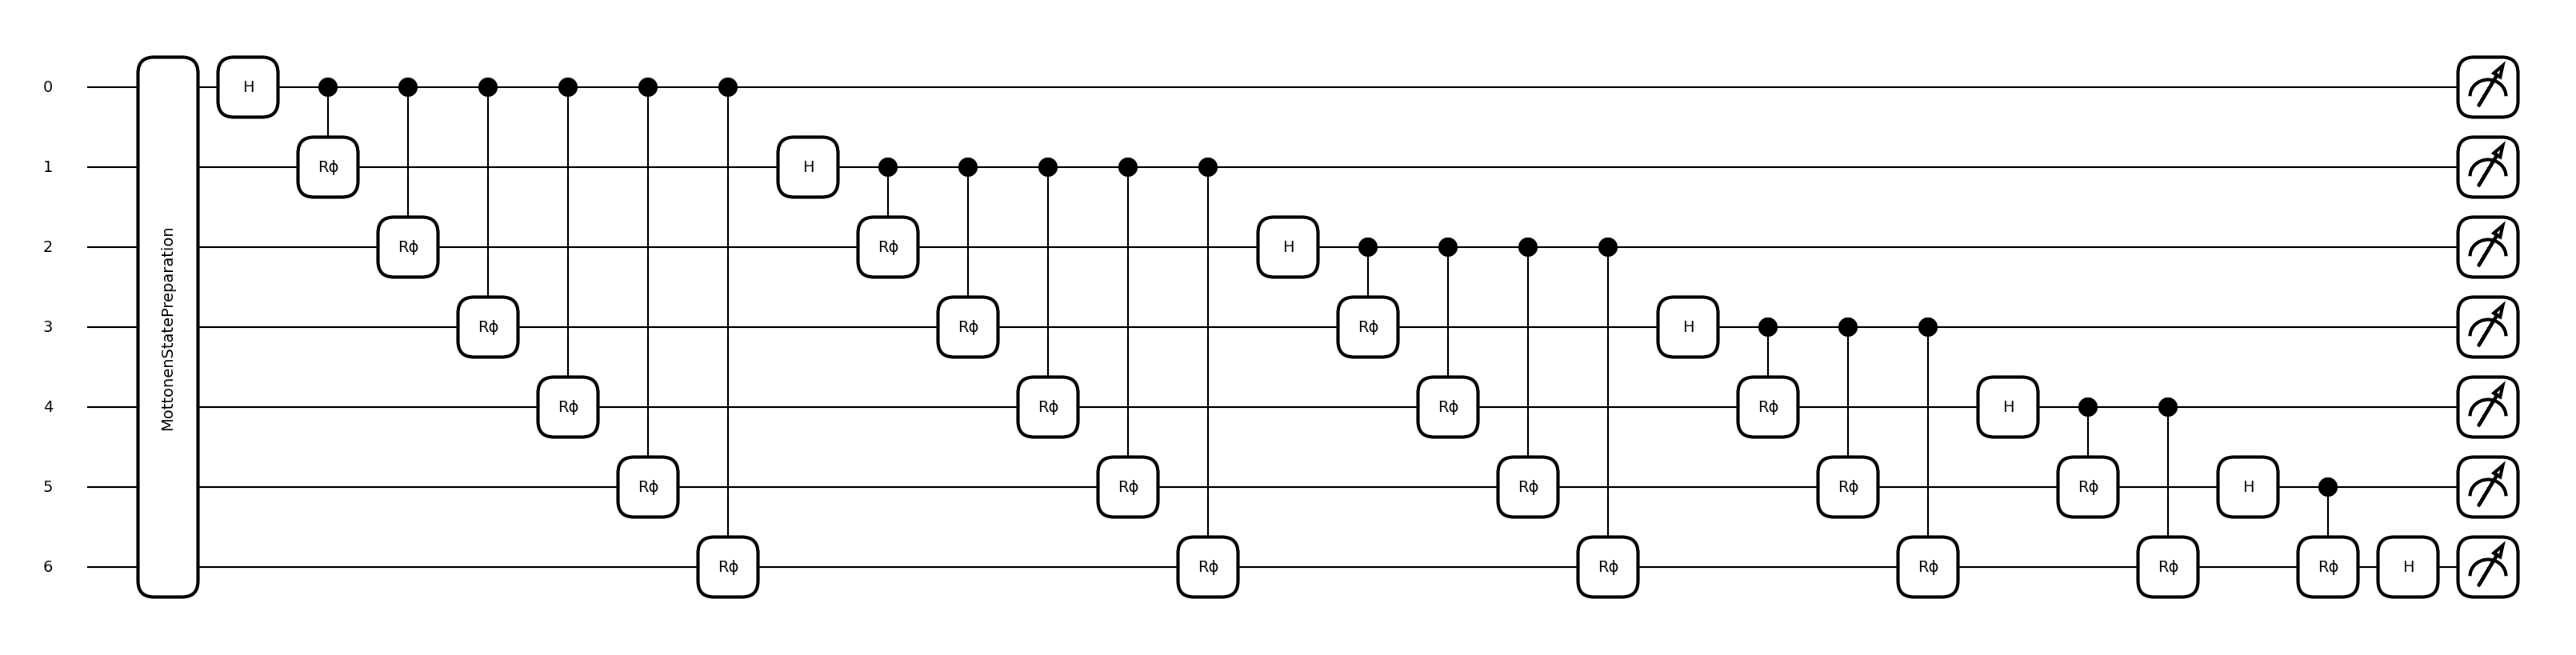

In [9]:
qml.draw_mpl( varqft.P_eval() )()

In [10]:
varqft.X_eval()()

0.2500000006503999

In [11]:
varqft.P_eval()()

0.2499999992952156

In [12]:
varqft.energy_eval()

0.4999999999456155

In [13]:
val

0.4999999999456181